In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os
%matplotlib inline

In [5]:
data=pd.read_csv('./results/results_4/model_1_without_random.csv')

In [6]:
data.describe()

,BATCH_SIZE,CPU_PERC,RUN,TIME
count,396.000000,396.000000,396.000000,396.000000
mean,341.250000,0.500000,1.000000,3.536167
std,592.002708,0.316628,0.817529,2.349281
min,1.000000,0.000000,0.000000,0.491313
25%,7.000000,0.200000,0.000000,2.007821
50%,48.000000,0.500000,1.000000,3.275033
75%,320.000000,0.800000,2.000000,4.436564
max,2048.000000,1.000000,2.000000,14.590096


In [7]:
sizes=[1,2,4,8,16,32,64,128,256,512,1024,2048]
for x in sizes:
    locals()['data_b_{0}'.format(x)]=data.loc[data["BATCH_SIZE"]==x]


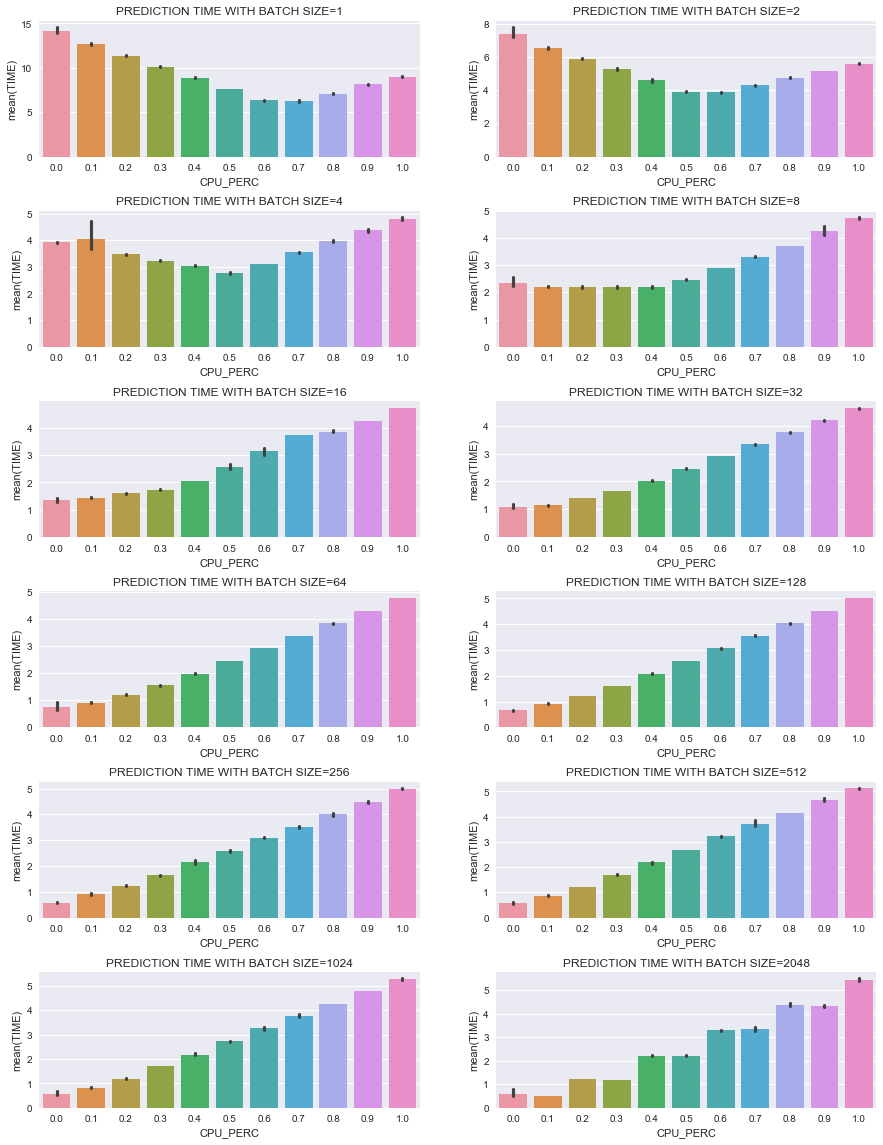

In [8]:
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.4)
plt.subplot(6,2,1)
plt.title('PREDICTION TIME WITH BATCH SIZE=1')
sns.barplot(x='CPU_PERC',y='TIME',data=data_b_1)
plt.subplot(6,2,2)
plt.title('PREDICTION TIME WITH BATCH SIZE=2')
sns.barplot(x='CPU_PERC',y='TIME',data=data_b_2)
plt.subplot(6,2,3)
plt.title('PREDICTION TIME WITH BATCH SIZE=4')
sns.barplot(x='CPU_PERC',y='TIME',data=data_b_4)
plt.subplot(6,2,4)
plt.title('PREDICTION TIME WITH BATCH SIZE=8')
sns.barplot(x='CPU_PERC',y='TIME',data=data_b_8)
plt.subplot(6,2,5)
plt.title('PREDICTION TIME WITH BATCH SIZE=16')
sns.barplot(x='CPU_PERC',y='TIME',data=data_b_16)
plt.subplot(6,2,6)
plt.title('PREDICTION TIME WITH BATCH SIZE=32')
sns.barplot(x='CPU_PERC',y='TIME',data=data_b_32)
plt.subplot(6,2,7)
plt.title('PREDICTION TIME WITH BATCH SIZE=64')
sns.barplot(x='CPU_PERC',y='TIME',data=data_b_64)
plt.subplot(6,2,8)
plt.title('PREDICTION TIME WITH BATCH SIZE=128')
sns.barplot(x='CPU_PERC',y='TIME',data=data_b_128)
plt.subplot(6,2,9)
plt.title('PREDICTION TIME WITH BATCH SIZE=256')
sns.barplot(x='CPU_PERC',y='TIME',data=data_b_256)
plt.subplot(6,2,10)
plt.title('PREDICTION TIME WITH BATCH SIZE=512')
sns.barplot(x='CPU_PERC',y='TIME',data=data_b_512)
plt.subplot(6,2,11)
plt.title('PREDICTION TIME WITH BATCH SIZE=1024')
sns.barplot(x='CPU_PERC',y='TIME',data=data_b_1024)
plt.subplot(6,2,12)
plt.title('PREDICTION TIME WITH BATCH SIZE=2048')
sns.barplot(x='CPU_PERC',y='TIME',data=data_b_2048)


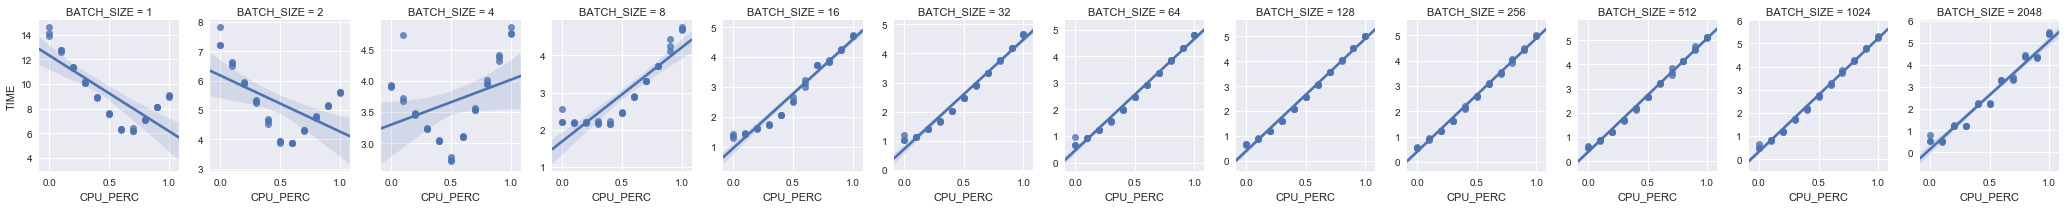

In [9]:
sns.lmplot(x="CPU_PERC",y="TIME",col="BATCH_SIZE",data=data,sharey=False,size=3,aspect=0.8)
plt.figure(figsize=(200,200))

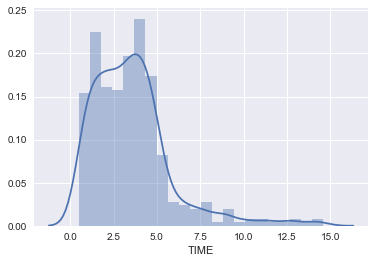

In [10]:
sns.distplot(data["TIME"])

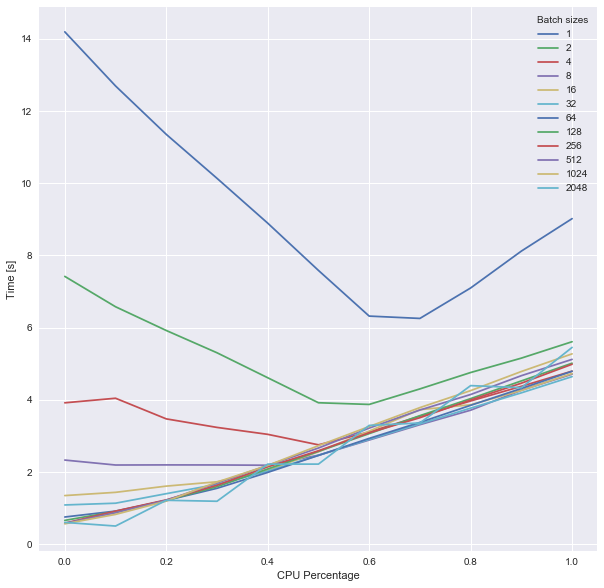

In [11]:
plt.figure(figsize=(10, 10))
for batch_size in sizes:
    times = data.loc[data['BATCH_SIZE'] == batch_size,:].groupby(['CPU_PERC']).mean()['TIME']
    plt.plot(np.linspace(0, 1, 11), times)
plt.legend(sizes, title='Batch sizes', loc=1)
plt.xlabel('CPU Percentage')
plt.ylabel('Time [s]')

In [12]:
def plot_cpu_gpu_time(data, title):
    plt.figure(figsize=(10, 10))

    for batch_size in sizes:
        times = data.loc[data['BATCH_SIZE'] == batch_size,:].groupby(['CPU_PERC']).mean()['TIME']
        plt.plot(np.linspace(0, 1, 11), times)
    plt.legend(sizes, title='Batch sizes', loc=0)
    plt.xlabel('CPU Percentage')
    plt.ylabel('Time [s]')
    plt.title(title)

In [13]:
def plot_models_batch_size(data, batch_size, titles):
    plt.figure(figsize=(10, 10))

    for d in data:
        times = d.loc[d['BATCH_SIZE'] == batch_size,:].groupby(['CPU_PERC']).mean()['TIME']
        plt.plot(np.linspace(0, 1, 11), times)
    plt.legend(titles, title='Models', loc=0)
    plt.xlabel('CPU Percentage')
    plt.ylabel('Time [s]')
    plt.title('Model comparison for batch size {0}'.format(batch_size))

In [16]:
all_data = [pd.read_csv(f) for f in glob.glob('results/results_4/*')]
titles = [os.path.basename(x)[:-4] for x in glob.glob('results/results_4/*')]

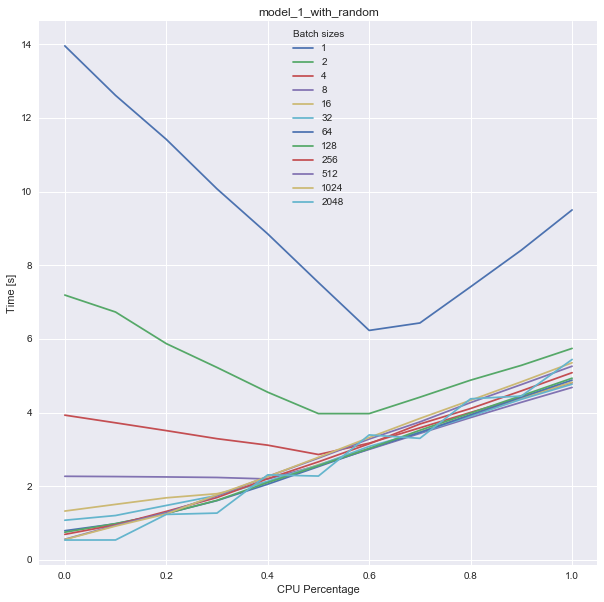

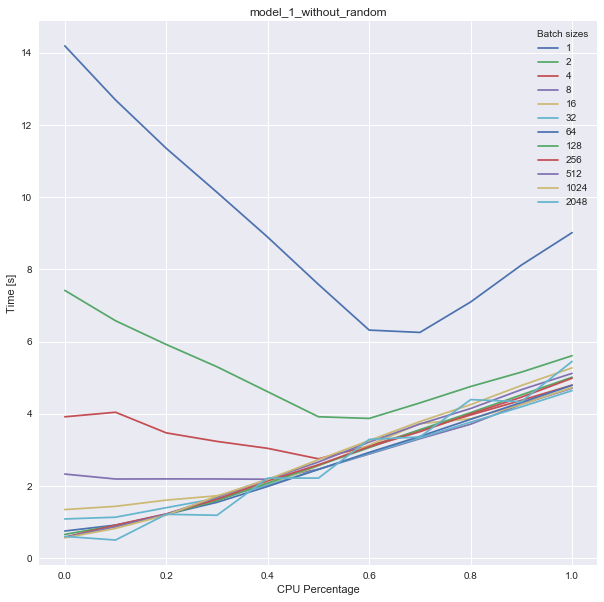

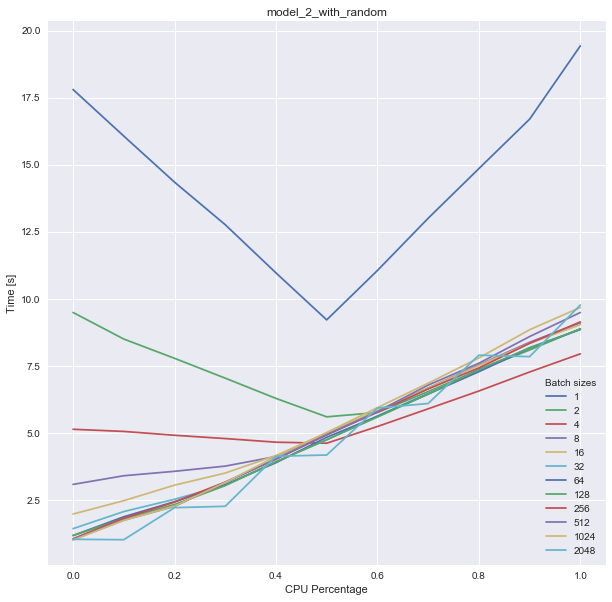

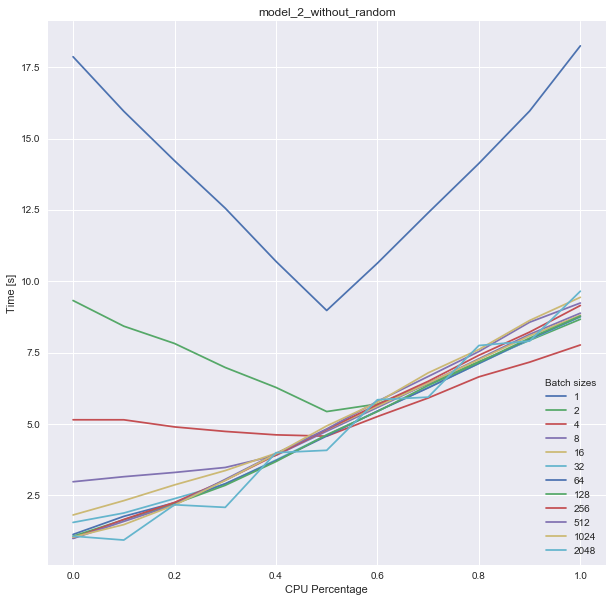

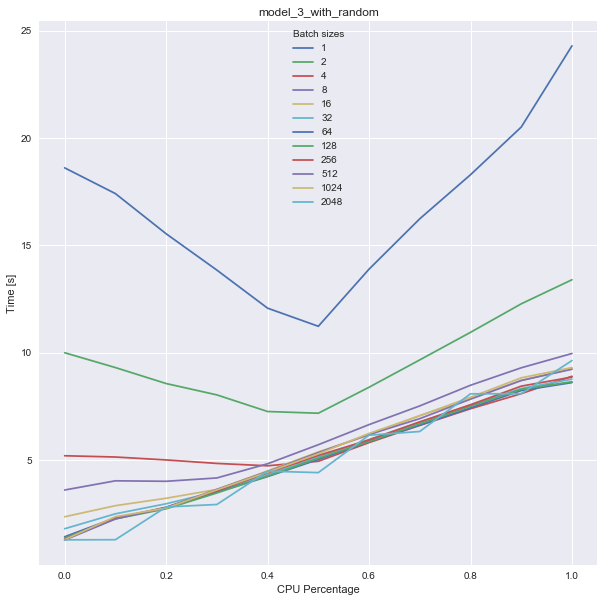

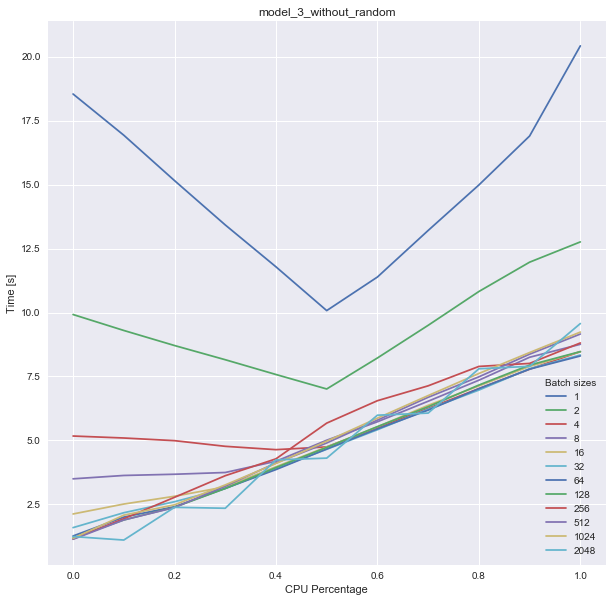

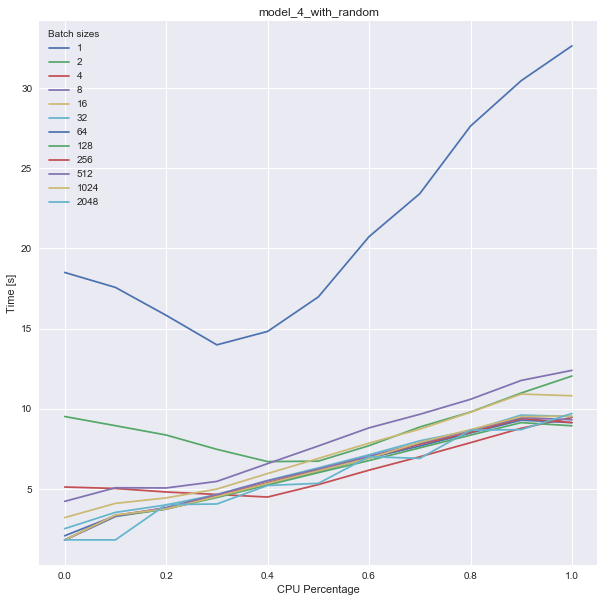

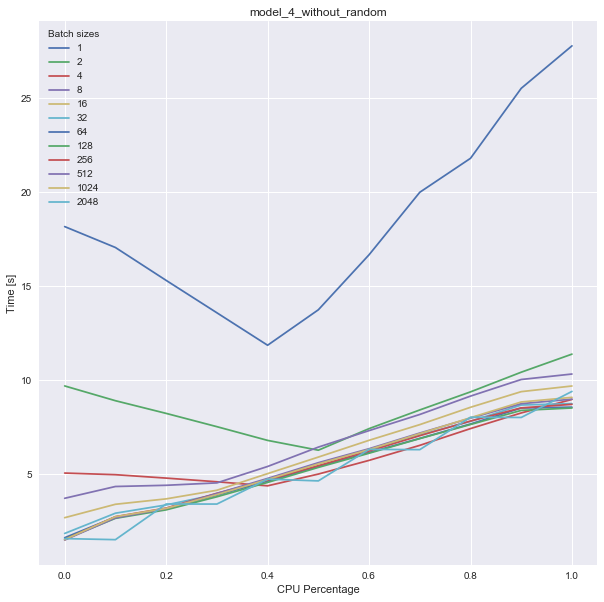

In [17]:
for data, model in zip(all_data, titles):
    plot_cpu_gpu_time(data, model)

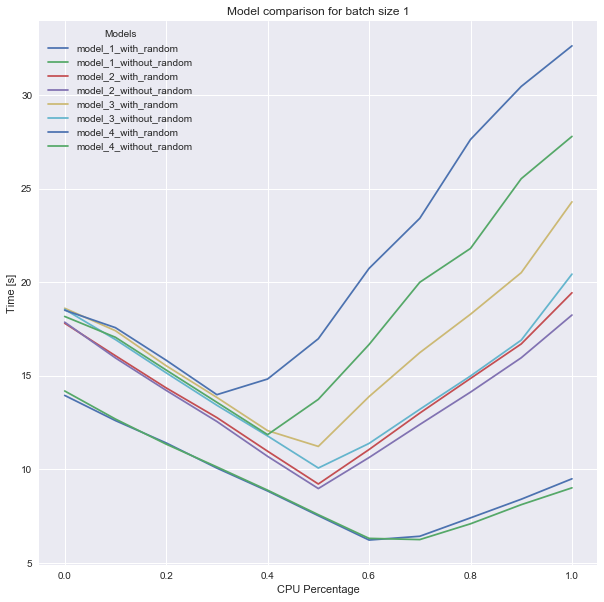

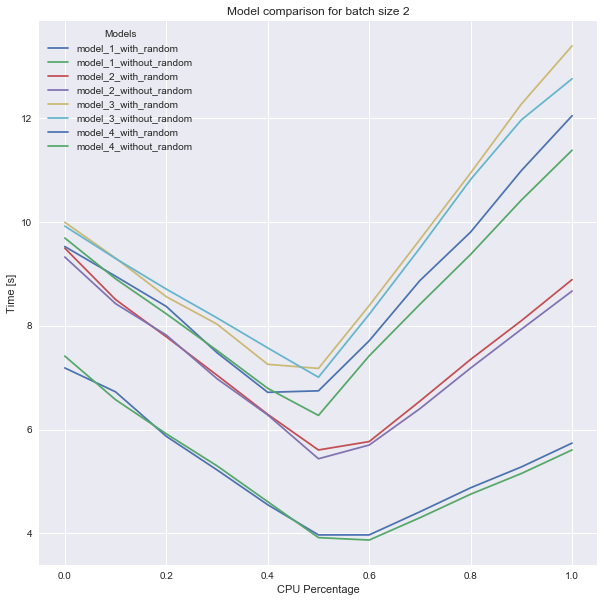

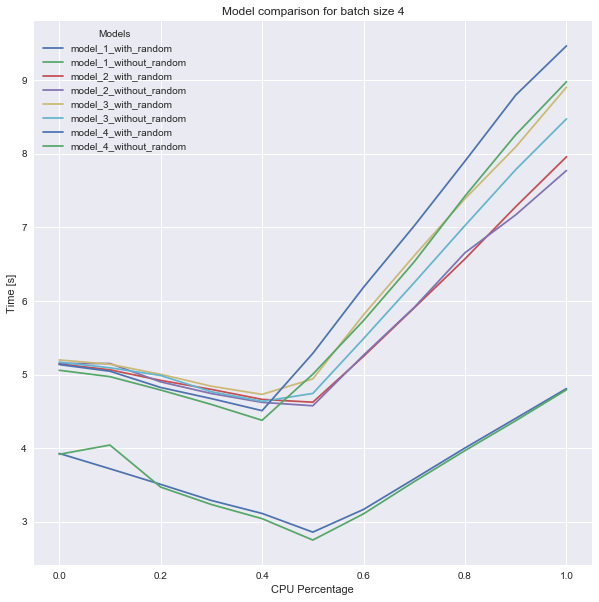

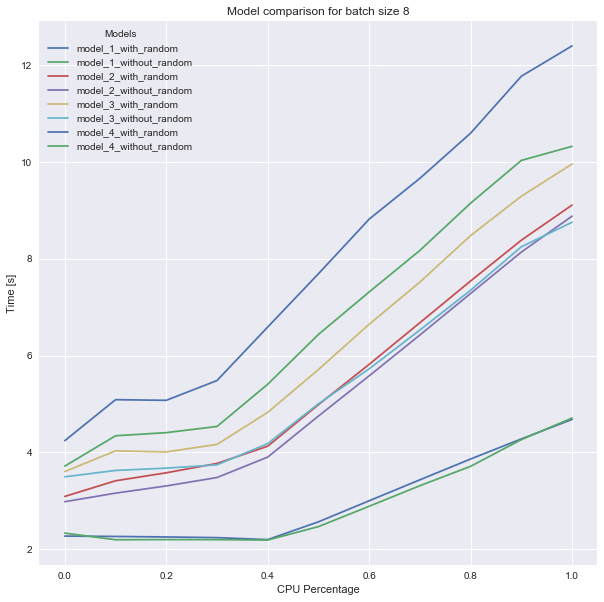

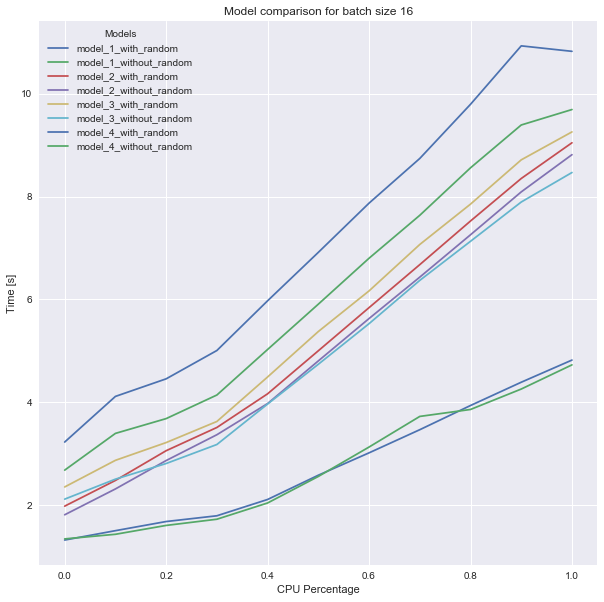

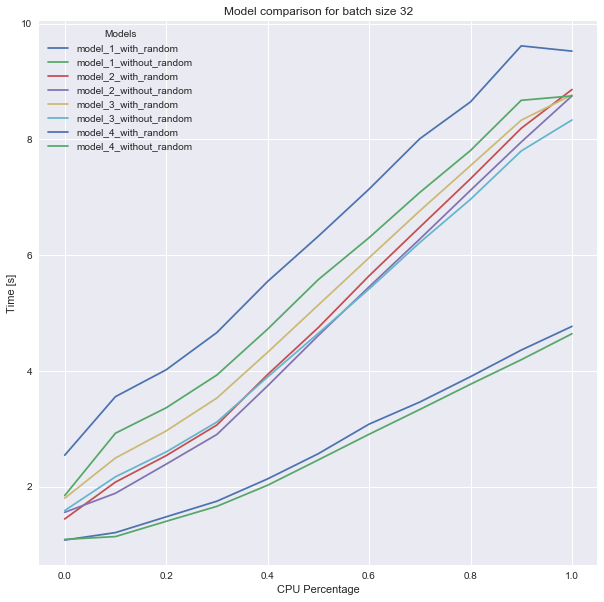

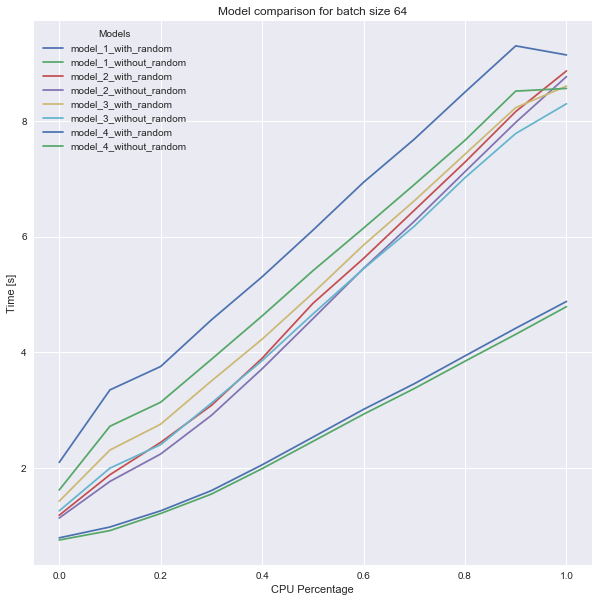

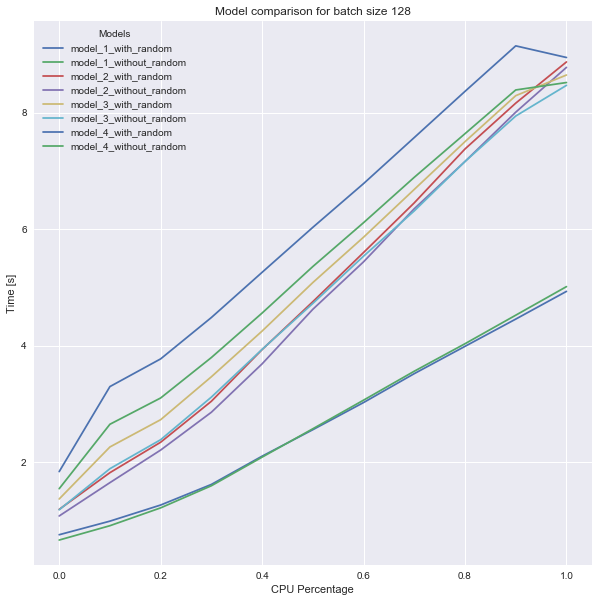

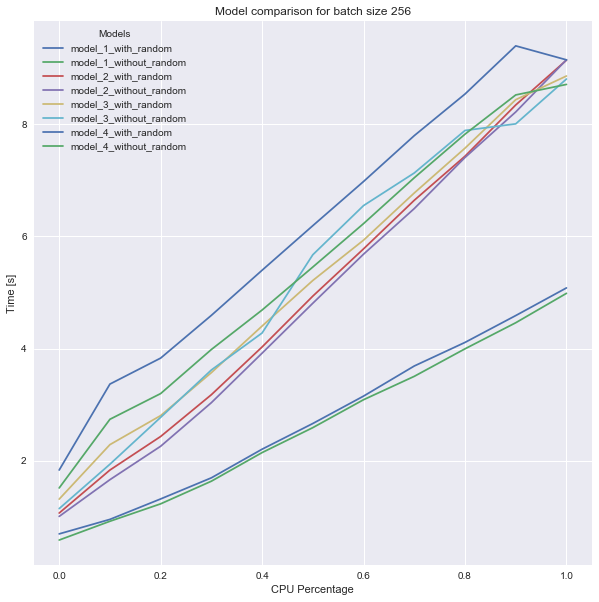

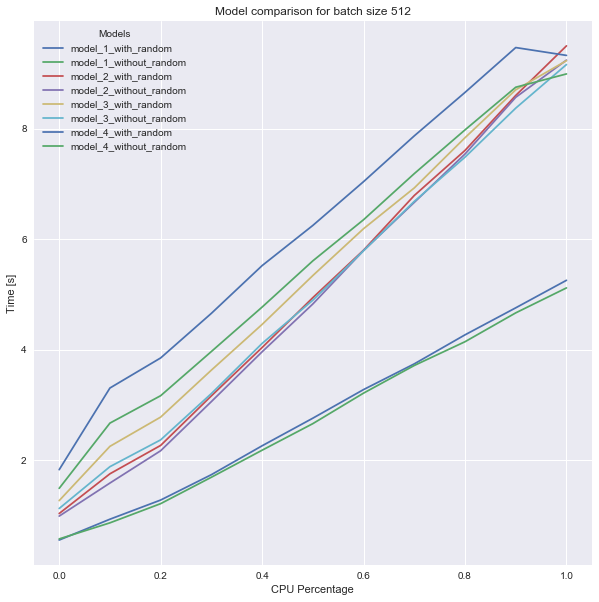

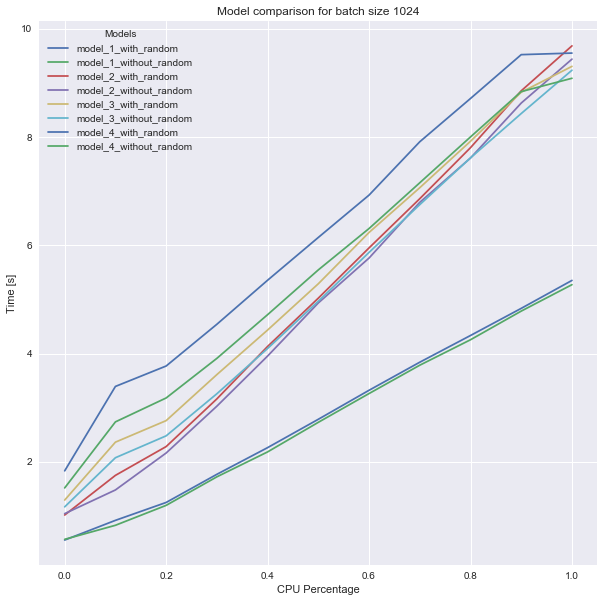

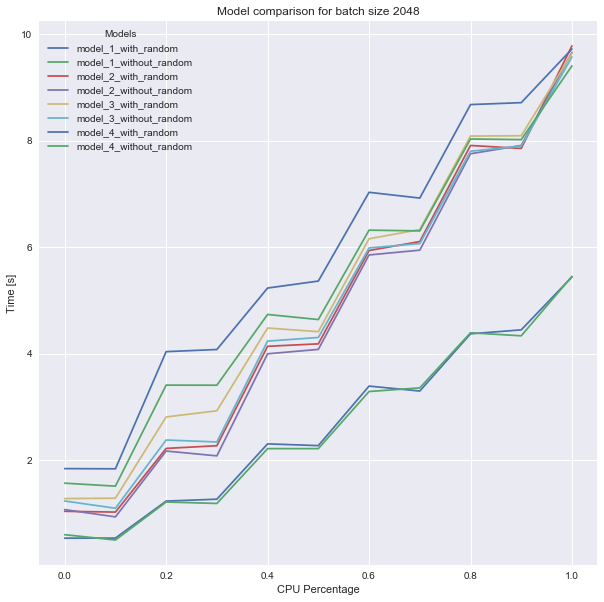

In [18]:
for bsize in sizes:
    plot_models_batch_size(all_data, bsize, titles)